**22.4 Numerical Error and Instability**

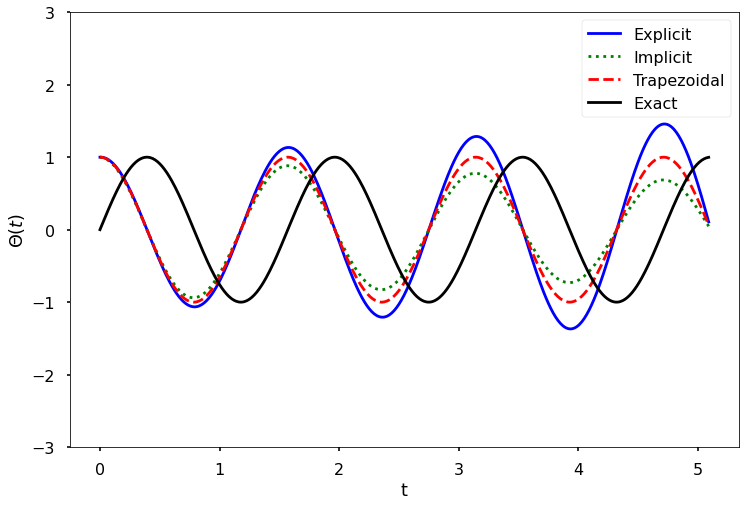

In [48]:
#This is the code for the textbook; however, I altered it to make the step size smaller and test out the functions using Sine instead of Cosine.

#Import Packages
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline 

#Define Variables and Arrays
h = 0.01
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])
m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

#Arrays of zeros
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

#Integrate
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

#For loop with dot 
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

#Display the plot
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.sin(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**22.5 Predictor-Corrector and Runge Kutta Methods**

In [49]:
#This example illustrates an example of using Runge Kutta in Python.

#Definition of (x,y) function for the for loop
def f(x,y):
  return x+y

#Initialize Variables
x = 1
y = 2
x2 = 2
n = 4
h = (x2-x)/n

#For loop to go through the functions provided in the textbook   
for i in range(n):
    k1 = h * (f(x, y))
    k2 = h * (f((x+h/2), (y+k1/2)))
    k3 = h * (f((x+h/2), (y+k2/2)))
    k4 = h * (f((x+h), (y+k3)))
    k = (k1+2*k2+2*k3+k4)/6
    y2 = y + k
    #Print statements within for loop for each one
    print('x: ', x)
    print('y: ', y)
    print('y2: ' ,y2)
    #Re-establish x and y
    y = y2
    x = x+h
#Final print statements
print('\n')
print('x2: ', x2)
print('y2: ', y2)


x:  1
y:  2
y2:  2.8860677083333335
x:  1.25
y:  2.8860677083333335
y2:  4.094797876146105
x:  1.5
y:  4.094797876146105
y2:  5.717832103664814
x:  1.75
y:  5.717832103664814
y2:  7.872839756805293


x2:  2
y2:  7.872839756805293


**22.6 Python ODE Solvers**

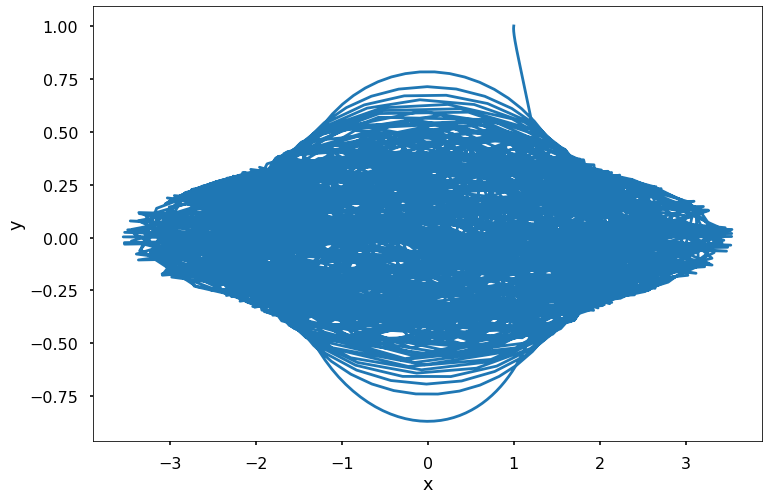

In [50]:
#This example utilizes code from the textbook, but alteres the equations presented in the array. In this case I had t^4 and -t^2

#Import Packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#Establihment of functions and variables
F = lambda t, s: np.dot(np.array([[0, t**4], [-t**2, 0]]), s)

#Sets up the ivp from python
t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

#Plots the graph
plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()